<a href="https://colab.research.google.com/github/Dhairya890/GIS-SEM1/blob/main/GIS_INDIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TITLE**

### *Exploring Crime, Education, and Population Density: A GIS Project in India*


#**DESCRIPTION**

### *The primary objective of this project is to analyze and compare crime rates and education status across different districts of India. By examining these three critical dimensions – population density, crime rates, and education levels*

#**DATASET SOURCES**

### Population Density Data:

#### https://www.kaggle.com/datasets/imdevskp/india-district-wise-shape-files

## Education Data:

#### https://livingatlas-dcdev.opendata.arcgis.com/datasets/esriindia1::india-education-2014-15/explore?showTable=true

## Crime Data:

#### https://data.gov.in/catalog/district-wise-crimes-under-various-sections-indian-penal-code-ipc-crimes



# IMPORTS

In [1]:
!pip install mapclassify
import mapclassify
import os, zipfile
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from google.colab import files
from google.colab import data_table
data_table.enable_dataframe_formatter()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 915.8 kB/s eta 0:00:00


# EXTRACTING FILES

In [2]:
! wget -q -O IND.zip https://drive.google.com/uc?id=1opoGF1mPFkiZwwk-rloTDRAprs2gfCn_&export=download
zip_ref = zipfile.ZipFile('IND.zip', 'r'); zip_ref.extractall(); zip_ref.close()
Ind = gpd.read_file('INDIA-MAP.shp')

# PLOTTING DATA

<Axes: >

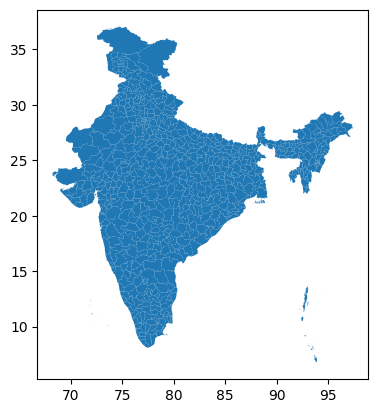

In [3]:
Ind.plot()

<Axes: >

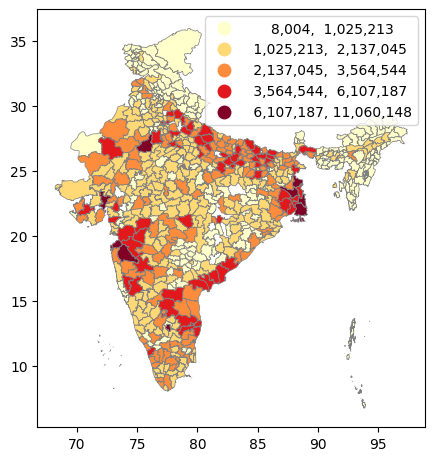

In [4]:
Ind.plot(figsize=(5,6),column='totalpopul',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.5,legend_kwds= {"fmt": "{:,.0f}"})
#Ind.dtypes

In [5]:
Ind.dtypes

objectid         int64
statecode       object
statename       object
state_ut        object
distcode        object
distname        object
distarea       float64
totalpopul     float64
totalhh        float64
totpopmale     float64
totpopfema     float64
st_areasha     float64
st_lengths     float64
geometry      geometry
dtype: object

# PS1

## CRIME

In [6]:
! wget -q -O education.csv https://drive.google.com/uc?id=1ckGy6E6jDCLkhQgZnDcG8pV4KjqHpuFb&export=download
! wget -q -O crime.csv https://drive.google.com/uc?id=18RF0JXp9V1TnAd_EFy1Sy72wKrQQXLIt&export=download

In [7]:
df_edu = pd.read_csv("education.csv")
df_crime = pd.read_csv("crime.csv")

In [8]:
Ind['distname']=Ind['distname'].str.upper()
df_crime['District']=df_crime['District'].str.upper()
df_crime.rename(columns={'District': 'distname'}, inplace=True)

In [9]:
df_pop_crime = pd.merge(Ind, df_crime, on='distname',how='inner',indicator=True)
df_pop_crime[['distname','Total Cognizable IPC crimes','totalpopul','_merge']]

,distname,Total Cognizable IPC crimes,totalpopul,_merge
0,NAINITAL,1095,954605.0,both
1,DEHRADUN,2178,1696694.0,both
2,ALMORA,139,622506.0,both
3,CHAMPAWAT,96,259648.0,both
4,UTTARKASHI,92,330086.0,both
...,...,...,...,...
481,MEDAK,6931,767428.0,both
482,NALGONDA,9254,1618416.0,both
483,ADILABAD,6036,708972.0,both
484,KHAMMAM,11022,1401639.0,both


In [10]:
df_pop_crime["crime_by_pop"] = df_pop_crime["totalpopul"]/df_pop_crime["Total Cognizable IPC crimes"]

<Axes: >

[]

[]

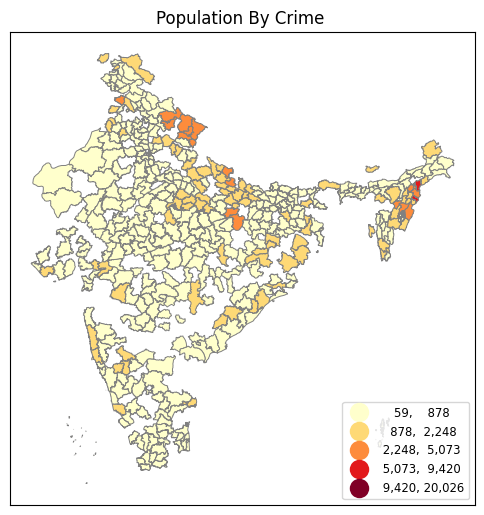

In [11]:
fig, ax = plt.subplots(1, figsize=(6,10))

df_pop_crime.plot(ax=ax,column='crime_by_pop',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=.7,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #

ax.title.set_text("Population By Crime ")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks

<Axes: >

[]

[]

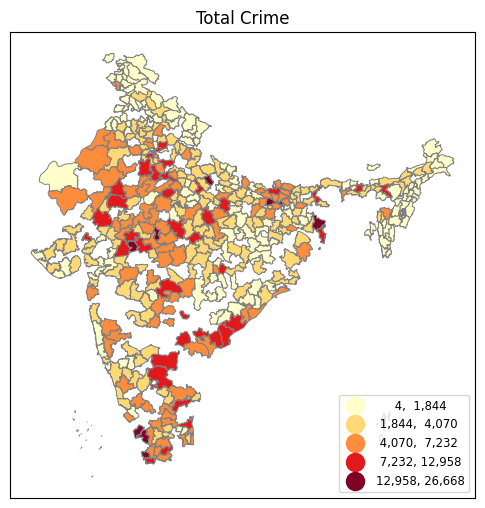

In [12]:
fig, ax = plt.subplots(1, figsize=(6,10))

df_pop_crime.plot(ax=ax,column='Total Cognizable IPC crimes',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=.7,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #

ax.title.set_text("Total Crime")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks

## Education

In [13]:
nan_counts = df_edu.iloc[:,3:].isna().sum()

# Find the column with the least NaN values
column_with_least_nan = nan_counts.idxmin()
min_nan_count = nan_counts.min()
print(f"Column with the least NaN values: {column_with_least_nan}")
print(f"Number of NaN values in that column: {min_nan_count}")

Column with the least NaN values: no_of_schools
Number of NaN values in that column: 54


In [14]:
df_edu['distname']=df_edu['distname'].str.upper()


In [15]:
df_pop_edu = pd.merge(Ind, df_edu, on='distname',how='outer',indicator=True)
df_pop_edu[['distname','no_of_schools','totalpopul','_merge']]

,distname,no_of_schools,totalpopul,_merge
0,NAINITAL,1991.0,954605.0,both
1,DEHRADUN,2449.0,1696694.0,both
2,ALMORA,2241.0,622506.0,both
3,CHAMPAWAT,854.0,259648.0,both
4,UTTARKASHI,1352.0,330086.0,both
...,...,...,...,...
704,MAHABUBNAGAR,4904.0,1486777.0,both
705,KARGIL,586.0,140802.0,both
706,LEH (LADAKH),NaN,133487.0,left_only
707,LEH(LADAKH),375.0,NaN,right_only


In [16]:
df_pop_edu["schools_by_popul"] = df_pop_edu["totalpopul"]/df_pop_edu["no_of_schools"]


<Axes: >

[]

[]

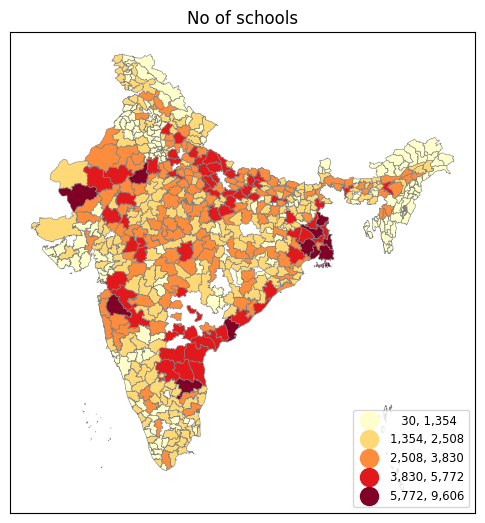

In [17]:

fig, ax = plt.subplots(1, figsize=(6,10))

df_pop_edu.plot(ax=ax,column='no_of_schools',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=.4,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
#leg1 = ax.get_legend()
#leg1.set_title('''Population Density
#2010 (pers/sq mi)''')
ax.title.set_text("No of schools")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks

<Axes: >

[]

[]

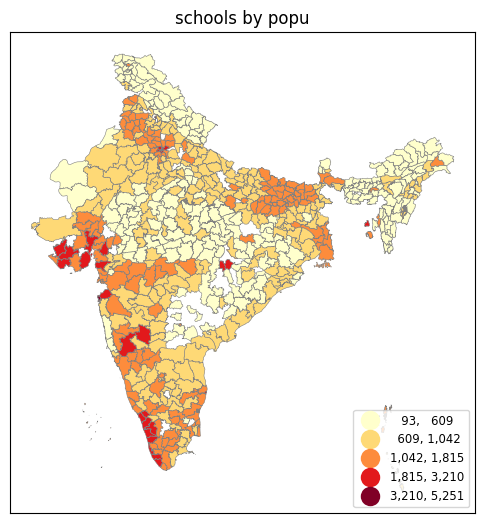

In [18]:

fig, ax = plt.subplots(1, figsize=(6,10))

df_pop_edu.plot(ax=ax,column='schools_by_popul',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=.4,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
#leg1 = ax.get_legend()
#leg1.set_title('''Population Density
#2010 (pers/sq mi)''')
ax.title.set_text("schools by popu")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks

In [19]:
df_crime_edu = pd.merge(df_crime, df_edu, on='distname',how='outer',indicator=True)


In [31]:
 df_crime_edu = df_crime_edu[['distname','Total Cognizable IPC crimes','no_of_schools','_merge']]

In [32]:
df_crime_edu["crime_by_schools"] = df_crime_edu["Total Cognizable IPC crimes"] / df_crime_edu["no_of_schools"]

<ipython-input-32-94bfc88a449d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_needed["crime_by_schools"] = df_crime_edu["Total Cognizable IPC crimes"] / df_crime_edu["no_of_schools"]


In [33]:
df_crime_edu["crime_by_schools"].isna().sum()

597

In [36]:
df_crime_edu.shape

(1066, 6)

In [35]:
df_crime_edu["geometry"] = Ind["geometry"]

<ipython-input-35-d14b68c0cbf5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_needed["geometry"] = Ind["geometry"]


AttributeError: ignored

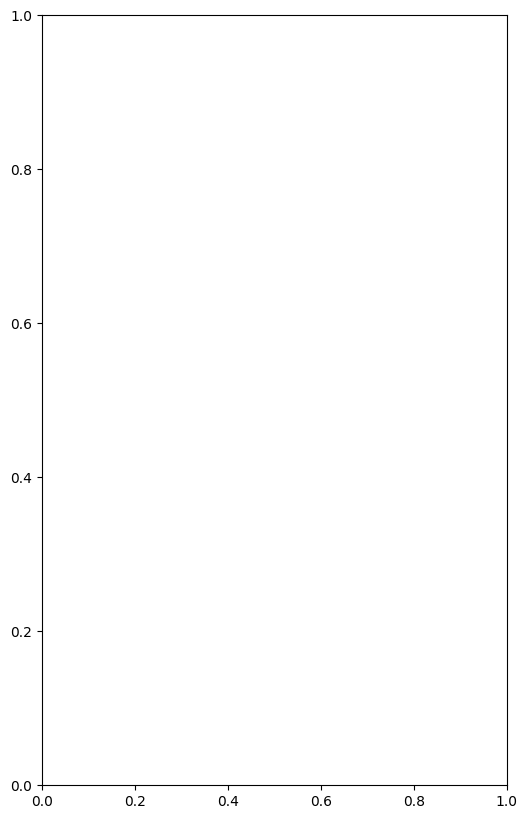

In [37]:

fig, ax = plt.subplots(1, figsize=(6,10))

df_crime_edu.plot(ax=ax,column='crime_by_schools',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=.4,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
#leg1 = ax.get_legend()
#leg1.set_title('''Population Density
#2010 (pers/sq mi)''')
ax.title.set_text("schools by popu")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks